## Le système de Ptolémée

Au II$^{me}$ siècle, l'astronome grec Ptolémée proposa un model géocentrique qui survivra jusqu'au XVII$^{me}$ siècle.

Dans le système de Ptolémée, la Terre se trouve au centre de l'univers et les autres corps célestes se déplacent le long d'une orbite circulaire de rayon $r$ (épicycle), dont le centre tourne autour de la Terre le long d'une orbite circulaire de rayon $R$ (déférent). 

On décrit le mouvement le long de l'épicycle et du déférent à l'aide des angles $\theta$ et $\phi$ tels que $\dot{\theta}=\omega$ et $\dot{\phi}=\Omega$, avec $\omega$ et $\Omega$, vitesses angulaires constantes et positives.

Quelle est l'allure de la trajectoire en fonction des paramètre $r$, $R$, $\omega$ et $\Omega$?

## Un petit dessin permet de visualiser la situation et les paramètres

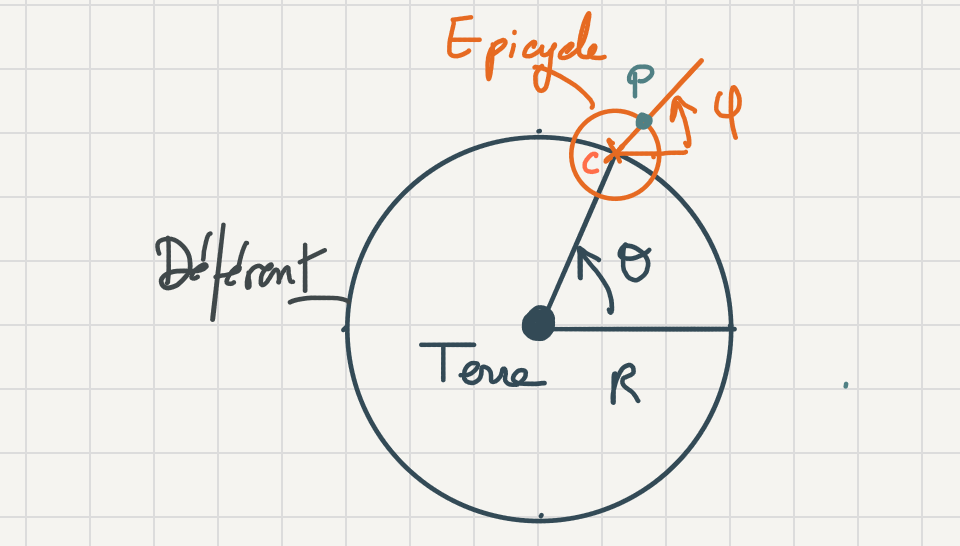

In [1]:
from IPython.display import Image
Image("Ptolemee.png")

## On trace la trajectoire de manière dynamique

In [2]:
%matplotlib widget
import numpy as np
from numpy import cos as cos 
from numpy import sin as sin 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image
from tqdm import tqdm

In [3]:
# computes the orbit
def orbit(r, center=(0,0)):
    N = 100
    theta = np.linspace(0,2*np.pi,N)
    y = r*np.sin(theta) + center[1]
    x = r*np.cos(theta) + center[0]
    return x,y

# computes the position of the Sun and the planet
def gen():
    for t in tqdm(np.arange(0,T_max, dt)):
        yield R*cos(W*t), R*sin(W*t), R*cos(W*t)+r*cos(w*t), R*sin(W*t)+r*sin(w*t), t


In [4]:
def init():
    axes.set_ylim(-1.1*(r+R), 1.1*(r+R))
    axes.set_xlim(-1.1*(r+R), 1.1*(r+R))
    axes.set_xlabel('x')
    axes.set_ylabel('y')
    axes.set_aspect('equal')
    axes.grid()

def func(data):    
    x1, y1, x2, y2, t = data
    time_text.set_text('Time = %.2f' % (t))
    
    trajx_1.append(x1)
    trajy_1.append(y1)
    trajx_2.append(x2)
    trajy_2.append(y2)
    
    cx1, cy1 = orbit(R)
    cx2, cy2 = orbit(r, center=(x1,y1))
    
    orb_1.set_data(cx1, cy1)
    orb_2.set_data(cx2, cy2)
    traj_1.set_data(trajx_1,trajy_1)
    traj_2.set_data(trajx_2,trajy_2)
    point_1.set_data(x1, y1)
    point_2.set_data(x2, y2)

In [5]:
#Plot layout setup
R = 5
r = 1
W = 1
w = 3*np.pi

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(8,8))
time_text = axes.text(0.05, 0.95, '', transform=axes.transAxes)

# dt is chosen such that the faster object revolves its orbit in 100 timestamps.
# T_max is chosen such that the sun revolves for at the Earth 5 times.
dt = 0.01#3.6*np.pi/180/max(abs(w), abs(W))
T_max = 2.*np.pi/abs(W)    
interval = 1./36 * 1000

orb_1, = axes.plot([],[], 'k--', lw=1)
orb_2, = axes.plot([], [], 'k--', lw=1)

traj_1, = axes.plot([], [], 'b-', lw=2)
traj_2, = axes.plot([], [], 'r-', lw=2)

point_0, = axes.plot([0], [0], 'ko', ms=6)
point_1, = axes.plot([], [], 'bo', ms=7)
point_2, = axes.plot([], [], 'ro', ms=7)

trajx_1, trajy_1 = [], []
trajx_2, trajy_2 = [], []
    
plt.ioff();
plt.rcParams['animation.html'] = 'html5'

animation = FuncAnimation(fig, func, gen, init_func=init, blit=False, interval=interval, save_count=int(T_max/dt) );
# it will take a while... 
animation

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

 20%|██        | 127/629 [00:05<00:21, 23.08it/s]